In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
import pickle

In [12]:
df = pd.read_csv('C:/Users/HP/Downloads/car_data_usd.csv')
# Load the dataset from a CSV file into a pandas DataFrame named 'df'.
df.head(10)
# Display the first 10 rows of the DataFrame to get an initial look at the data structure and content.

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price_USD,Present_Price_USD
0,ritz,2014,27000,Petrol,Dealer,Manual,0,3712.47,6194.84
1,sx4,2013,43000,Diesel,Dealer,Manual,0,5263.95,10572.23
2,ciaz,2017,6900,Petrol,Dealer,Manual,0,8034.45,10915.77
3,wagon r,2011,5200,Petrol,Dealer,Manual,0,3158.37,4599.03
4,swift,2014,42450,Diesel,Dealer,Manual,0,5097.72,7613.33
5,vitara brezza,2018,2071,Diesel,Dealer,Manual,0,10250.85,10893.61
6,ciaz,2015,18796,Petrol,Dealer,Manual,0,7480.35,8998.58
7,s cross,2015,33429,Diesel,Dealer,Manual,0,7203.30,9541.60
8,ciaz,2016,20273,Diesel,Dealer,Manual,0,9696.75,9851.90
9,ciaz,2015,42367,Diesel,Dealer,Manual,0,8256.09,9885.14


In [13]:
df.info()
# Display a concise summary of the DataFrame, including data types of columns, non-null values, and memory usage.
# This helps in quickly understanding the completeness and types of features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           301 non-null    object 
 1   Year               301 non-null    int64  
 2   Kms_Driven         301 non-null    int64  
 3   Fuel_Type          301 non-null    object 
 4   Seller_Type        301 non-null    object 
 5   Transmission       301 non-null    object 
 6   Owner              301 non-null    int64  
 7   Selling_Price_USD  301 non-null    float64
 8   Present_Price_USD  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
df.isnull()
# Check for null (missing) values in each cell of the DataFrame.
# Returns a boolean DataFrame of the same shape as 'df', where True indicates a missing value.

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price_USD,Present_Price_USD
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()
# Calculate the sum of null values for each column in the DataFrame.
# This provides a count of missing entries per feature, which is crucial for data cleaning.

Car_Name             0
Year                 0
Kms_Driven           0
Fuel_Type            0
Seller_Type          0
Transmission         0
Owner                0
Selling_Price_USD    0
Present_Price_USD    0
dtype: int64

In [16]:
df.describe()
# Generate descriptive statistics of the numerical columns in the DataFrame.
# This includes count, mean, standard deviation, min, max, and quartile values, offering insights into data distribution.

,Year,Kms_Driven,Owner,Selling_Price_USD,Present_Price_USD
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,36947.205980,0.043189,5165.647874,8453.872392
std,2.891554,38886.883882,0.247915,5632.771823,9579.408840
min,2003.000000,500.000000,0.000000,110.820000,354.620000
25%,2012.000000,15000.000000,0.000000,997.380000,1329.840000
50%,2014.000000,32000.000000,0.000000,3989.520000,7092.480000
75%,2016.000000,48767.000000,0.000000,6649.200000,10971.180000
max,2018.000000,500000.000000,3.000000,38787.000000,102619.320000


In [17]:
#Features=Selling Price, Present price,Year,KMS Driven
# This comment specifies the features of interest for analysis and modeling.

Text(0, 0.5, 'Selling Price_USD')

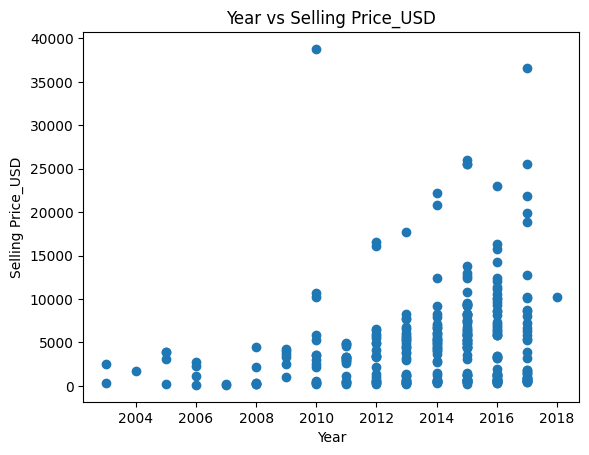

In [18]:
plt.scatter(df['Year'],df['Selling_Price_USD'], marker='o')
# Create a scatter plot to visualize the relationship between 'Year' and 'Selling_Price'.
plt.title('Year vs Selling Price_USD')
# Set the title of the plot.
plt.xlabel('Year')
# Set the label for the x-axis.
plt.ylabel('Selling Price_USD')
# Set the label for the y-axis.

Text(0, 0.5, 'Selling Price')

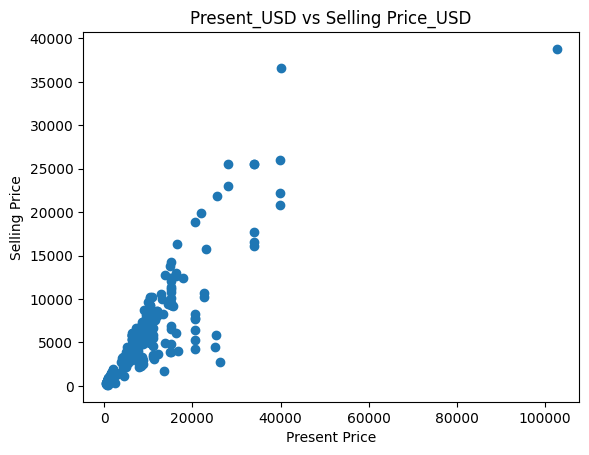

In [19]:
plt.scatter(df['Present_Price_USD'],df['Selling_Price_USD'])
# Create a scatter plot to visualize the relationship between 'Present_Price' and 'Selling_Price'.
plt.title('Present_USD vs Selling Price_USD')
# Set the title of the plot.
plt.xlabel('Present Price')
# Set the label for the x-axis.
plt.ylabel('Selling Price')
# Set the label for the y-axis.

Text(0, 0.5, 'Selling Price_USD')

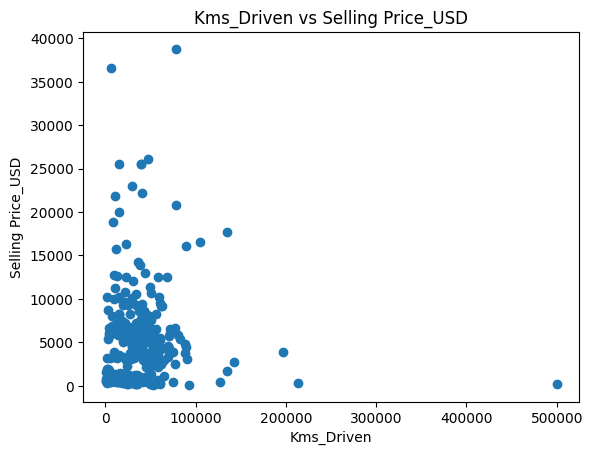

In [20]:
plt.scatter(df['Kms_Driven'],df['Selling_Price_USD'])
# Create a scatter plot to visualize the relationship between 'Kms_Driven' and 'Selling_Price'.
plt.title('Kms_Driven vs Selling Price_USD')
# Set the title of the plot.
plt.xlabel('Kms_Driven')
# Set the label for the x-axis.
plt.ylabel('Selling Price_USD')
# Set the label for the y-axis.

Text(0, 0.5, 'Selling Price_USD')

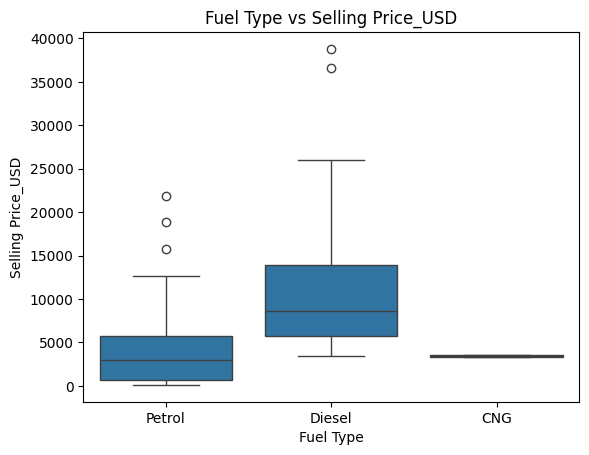

In [21]:
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price_USD')
# Create a box plot to visualize the distribution of 'Selling_Price' across different 'Fuel_Type' categories.
# Box plots help in understanding the spread and central tendency of the selling price for each fuel type.
plt.title('Fuel Type vs Selling Price_USD')
# Set the title of the plot.
plt.xlabel('Fuel Type')
# Set the label for the x-axis.
plt.ylabel('Selling Price_USD')
# Set the label for the y-axis.

In [22]:
#i want to know how many car model are under car name
unique_models = df['Car_Name'].unique()
print(unique_models)

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

<Axes: xlabel='Car_Name', ylabel='Selling_Price_USD'>

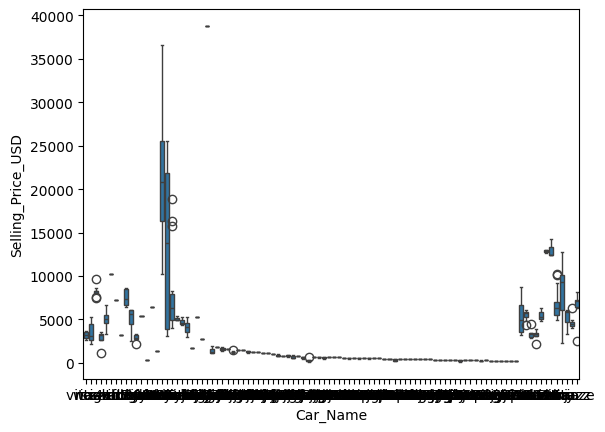

In [24]:
sns.boxplot(data=df, x ='Car_Name', y='Selling_Price_USD')

In [25]:
#The car Name have too much data on different models that is why it is overlapping

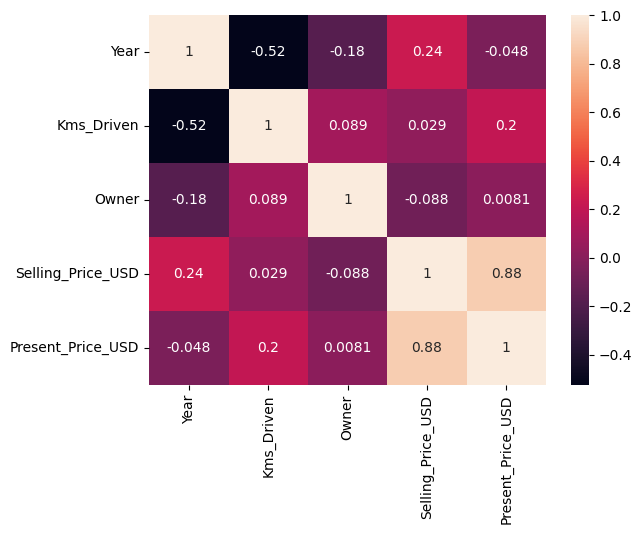

In [26]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
# Generate a heatmap of the correlation matrix for all numerical columns in the DataFrame.
# 'numeric_only=True' ensures only numerical columns are considered for correlation.
# 'annot=True' displays the correlation coefficients on the heatmap cells, providing a quick visual summary of relationships between variables.
plt.show()

In [32]:
#since I can be rewriting multiple features every time, I will change all of them to X then the Target will be y
# Define the feature matrix (X) and the target variable (Y).
# X includes 'Year', 'Present_Price', and 'Kms_Driven' as independent variables.
X = df[['Year', 'Present_Price_USD', 'Kms_Driven' ]]
# Y is the 'Selling_Price' column, which is the dependent variable we want to predict.
Y = df['Selling_Price_USD']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state =42)
# Split the dataset into training and testing sets.
# X_train, Y_train: Training features and target variable.
# X_test, Y_test: Testing features and target variable.
# test_size=0.3: 30% of the data will be used for testing, and 70% for training.

In [34]:
model = LinearRegression()
# Initialize the Linear Regression model.
model.fit(X_train, Y_train)
# Train the Linear Regression model using the training data (X_train, Y_train).

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
model.coef_
# Display the coefficients of the trained Linear Regression model.

array([5.10156825e+02, 4.96763002e-01, 7.18245186e-04])

In [36]:
model.intercept_
# Display the intercept (bias) of the trained Linear Regression model.

np.float64(-1026338.6522979969)

In [37]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Display the predicted selling price.
display(prediction)

array([6253.11678845])

In [38]:
Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Linear Regression model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE) between actual (Y_test) and predicted (Y_pred) values.
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE) between actual (Y_test) and predicted (Y_pred) values.
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Linear Regression Model is:{r2_percent:0f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

4998693.413637048

1550.9916029575372

0.8570550971015483

My Linear Regression Model is:85.705510% correct


In [39]:
model = DecisionTreeRegressor()
# Initialize the Decision Tree Regressor model.
model.fit(X_train,Y_train)
# Train the Decision Tree Regressor model using the training data (X_train, Y_train).

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [40]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Display the predicted selling price.
display(prediction)

array([554.1])

In [41]:
Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Decision Tree Regressor model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE) between actual (Y_test) and predicted (Y_pred) values.
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE) between actual (Y_test) and predicted (Y_pred) values.
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Decision Tree Model is:{r2_percent:2f} percentage correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

1753257.9420813187

776.1052747252747

0.9498630410892908

My Decision Tree Model is:94.986304 percentage correct


In [42]:
model = RandomForestRegressor()
# Initialize the Random Forest Regressor model.
model.fit(X_train,Y_train)
# Train the Random Forest Regressor model using the training data (X_train, Y_train).

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Display the predicted selling price.
display(prediction)

array([527.7272])

In [44]:
Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Random Forest Regressor model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Random Forest Model is:{r2_percent:2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

1264581.275201367

695.4003692307679

0.9638374605856583

My Random Forest Model is:96.383746% correct


In [45]:
model = GradientBoostingRegressor(n_estimators=100)
# Initialize the Gradient Boosting Regressor model with 100 estimators.
model.fit(X_train,Y_train)
# Train the Gradient Boosting Regressor model using the training data (X_train, Y_train).

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [46]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Make a prediction using the trained Gradient Boosting Regressor for a new data point:
# Year=2024, Present_Price=20, Kms_Driven=34000.
display(prediction)
# Display the predicted selling price.

Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Gradient Boosting Regressor model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Gradient Boosting Model is:{r2_percent:2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

array([597.73339192])

1046567.3359540259

663.2788434846209

0.9700718860239541

My Gradient Boosting Model is:97.007189% correct


In [47]:
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Initialize the Support Vector Regressor (SVR) model.
model.fit(X_train,Y_train)
# Train the SVR model using the training data (X_train, Y_train).

,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,1000.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [48]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Make a prediction using the trained Support Vector Regressor for a new data point:
# Year=2024, Present_Price=20, Kms_Driven=34000.
display(prediction)
# Display the predicted selling price.

Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Support Vector Regressor model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Support Vector Model is:{r2_percent:2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

array([4122.16750851])

35970076.68734274

3971.5848365329707

-0.028616619153873035

My Support Vector Model is:-2.861662% correct


In [49]:
import xgboost as xgb
import lightgbm as lgb

In [50]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
# Initialize the XGBoost Regressor model.
model.fit(X_train, Y_train)
# Train the XGBoost Regressor model using the training data (X_train, Y_train).

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [51]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Make a prediction using the trained XGBoost Regressor for a new data point:
# Year=2024, Present_Price=20, Kms_Driven=34000.
display(prediction)
# Display the predicted selling price.

Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained XGBoost Regressor model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My XGBoost Regressor Model is:{r2_percent:.2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

array([559.89856], dtype=float32)

1343594.320520861

719.8050879778181

0.9615779677229648

My XGBoost Regressor Model is:96.16% correct


In [52]:
model = lgb.LGBMRegressor(objective='regression', n_estimators=100)
# Initialize the LightGBM Regressor model.
model.fit(X_train, Y_train)
# Train the LightGBM Regressor.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 3
[LightGBM] [Info] Start training from score 5068.062417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [53]:

prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Make a prediction using the trained LightGBM Regressor for a new data point:
# Year=2024, Present_Price=20, Kms_Driven=34000.
display(prediction)
# Display the predicted selling price.

Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained LightGBM Regressor model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My LightGBM Regressor Model is:{r2_percent:.2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

array([1020.63676124])

7510179.769836847

1470.230997812332

0.785235494735386

My LightGBM Regressor Model is:78.52% correct


In [54]:
model = Lasso(alpha=1.0)
# Initialize the Lasso Regression model with an alpha of 1.0.
model.fit(X_train,Y_train)
# Train the Lasso Regression model using the training data (X_train, Y_train).

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [55]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Make a prediction using the trained Lasso Regression for a new data point:
# Year=2024, Present_Price=20, Kms_Driven=34000.
display(prediction)
# Display the predicted selling price.

Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Lasso Regression model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Lasso Regression Model is:{r2_percent:.2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

array([6251.46077248])

4998870.040245949

1550.9787506385865

0.8570500462069705

My Lasso Regression Model is:85.71% correct


In [56]:
model = Ridge(alpha=1.0)
# Initialize the Ridge Regression model with an alpha of 1.0.
model.fit(X_train,Y_train)
# Train the Ridge Regression model using the training data (X_train, Y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [57]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Make a prediction using the trained Ridge Regression for a new data point:
# Year=2024, Present_Price=20, Kms_Driven=34000.
display(prediction)
# Display the predicted selling price.

Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Ridge Regression model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Ridge Regression Model is:{r2_percent:.2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

array([6249.09903016])

4999122.352187509

1550.9604054471422

0.8570428309803099

My Ridge Regression Model is:85.70% correct


In [58]:
model = BaggingRegressor(n_estimators=100, random_state=42)
# Initialize the Bagging Regressor model with 100 estimators and a random state for reproducibility.
model.fit(X_train, Y_train)
# Train the Bagging Regressor model using the training data (X_train, Y_train).

,estimator,None
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [59]:
prediction = model.predict(pd.DataFrame([[2024, 20, 34000]], columns=X_train.columns))
# Make a prediction using the trained Bagging Regressor for a new data point:
# Year=2024, Present_Price=20, Kms_Driven=34000.
display(prediction)
# Display the predicted selling price.

Y_pred = model.predict(X_test)
# Generate predictions on the test set using the trained Bagging Regressor model.
mse = mean_squared_error(Y_test,Y_pred)
# Calculate the Mean Squared Error (MSE).
mae = mean_absolute_error(Y_test,Y_pred)
# Calculate the Mean Absolute Error (MAE).
r2 = r2_score(Y_test, Y_pred)
# Calculate the R-squared (R2) score.
r2_percent = r2 * 100
# Convert R2 score to a percentage.
display(mse)
display(mae)
display (r2)
# Display MSE, MAE, and R2 score.
print(f"My Bagging Regressor Model is:{r2_percent:.2f}% correct")
# Print the R2 score as a percentage, indicating the model's accuracy.

array([522.5189])

1334263.170794322

702.9008252747243

0.9618448055106059

My Bagging Regressor Model is:96.18% correct


In [61]:
#Save model
with open('Main intern project2.pkl', 'wb') as f:
    pickle.dump(model, f)